In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
## saving passenger id  in order to submit later. 
passengerid = test.PassengerId
all_data = pd.concat([train,test],axis = 0).reset_index(drop = True)

In [7]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


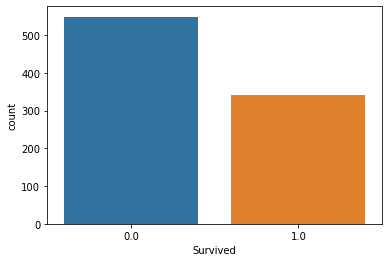

In [8]:
sns.countplot(x = 'Survived' , data = all_data)

**1. DEALING WITH MISSING VALUES**

In [9]:
all_data.isnull().sum().sort_values(ascending = False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Ticket            0
Parch             0
SibSp             0
Sex               0
Name              0
Pclass            0
PassengerId       0
dtype: int64

**Embarked**

In [10]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

In [12]:
all_data[all_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


**Fare**

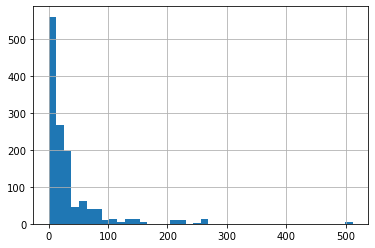

In [13]:
all_data['Fare'].hist(bins = 40 )

In [14]:
all_data["Fare"] = all_data["Fare"].fillna(np.mean(all_data[all_data["Pclass"] == 3]["Fare"]))

In [15]:
all_data[all_data["Fare"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


**Age**

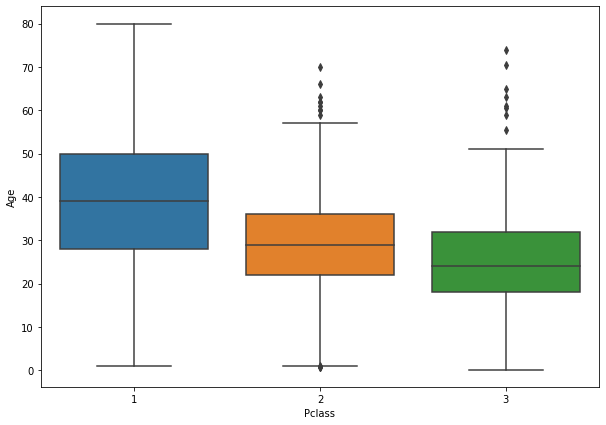

In [16]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass' , y = 'Age' , data = all_data)

 We can see that.....when we seperate by PClass , the wealthier passengers in the first and second class tend to be a little older than passengers in the third class . 
 We can use the **average age values** to impute the age.......based on Pclass

In [17]:
def impute_age (cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        
        

In [18]:
all_data['Age'] = all_data[['Age','Pclass']].apply(impute_age , axis = 1)

In [19]:
all_data[all_data["Age"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


**Cabin**

In [20]:
all_data.Cabin.fillna('U',inplace = True)

In [21]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [22]:
all_data.groupby('Cabin')['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
U     19.126958
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [23]:
def cabin_solving(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a
   

In [24]:
with_N = all_data[all_data.Cabin == "U"]

without_N = all_data[all_data.Cabin != "U"]
##applying cabin estimator function. 
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_solving(x))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [25]:
all_data[all_data['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [26]:
all_data.isnull().sum().sort_values(ascending = False)

Survived       418
Embarked         0
Cabin            0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [27]:
## getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

## PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

## Separating train and test from all_data. 
train = all_data[:891]

test = all_data[891:]




**2. DATA VISUALISATION**

2a. UNIVARIATE ANALYSIS

* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable: Fare, age and passengerId


In [28]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = train[variable]
    # count number of categorical variables
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
 

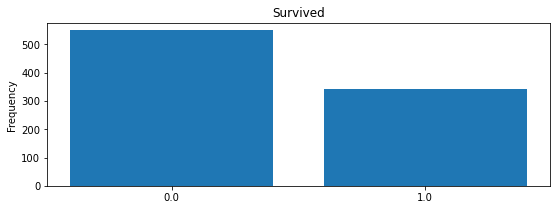

Survived: 
 0.0    549
1.0    342
Name: Survived, dtype: int64


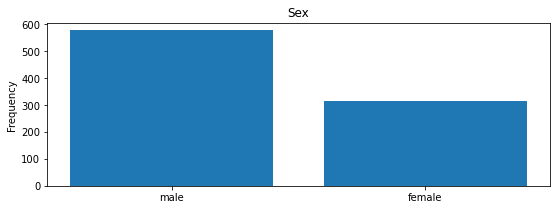

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


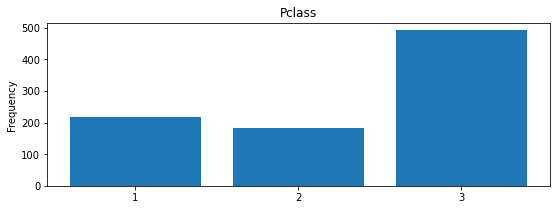

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


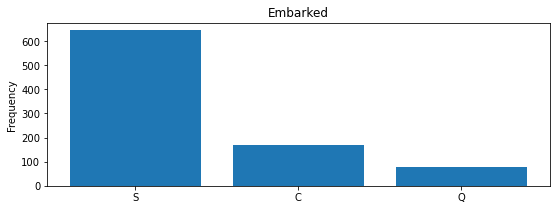

Embarked: 
 S    644
C    170
Q     77
Name: Embarked, dtype: int64


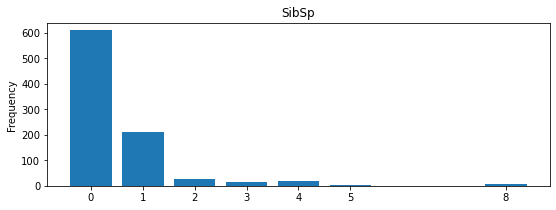

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


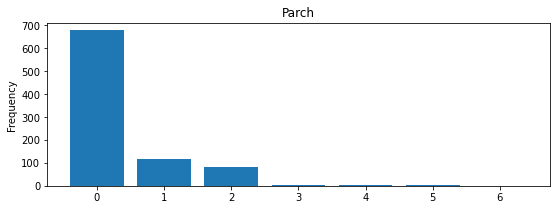

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [29]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [30]:
def histogram(variable):
    var = train[variable]
    plt.figure(figsize = (9,3))
    fig = train[variable].hist(bins = 10)
    fig.set_xlabel(variable)
    fig.set_ylabel('Survived')

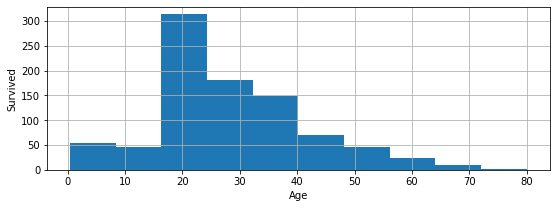

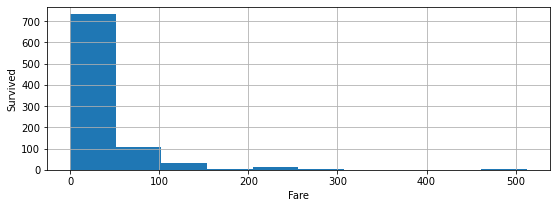

In [31]:
variables = ['Age' , 'Fare']
for c in variables:
    histogram(c)

**2b. BIVARIATE ANALYSIS**

* **Gender and Survived**

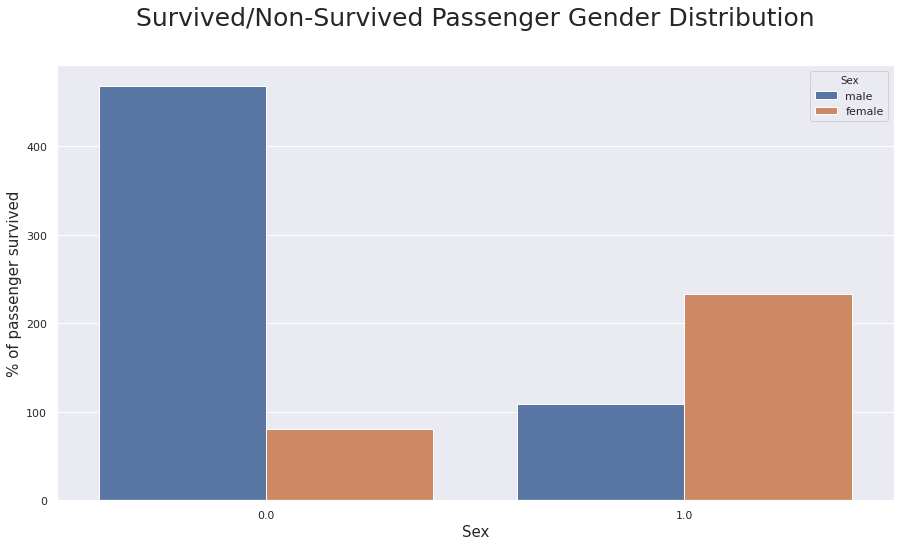

In [32]:
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
sns.countplot(x = 'Survived' , hue = 'Sex' , data = all_data)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);

* **PClass and Survived**

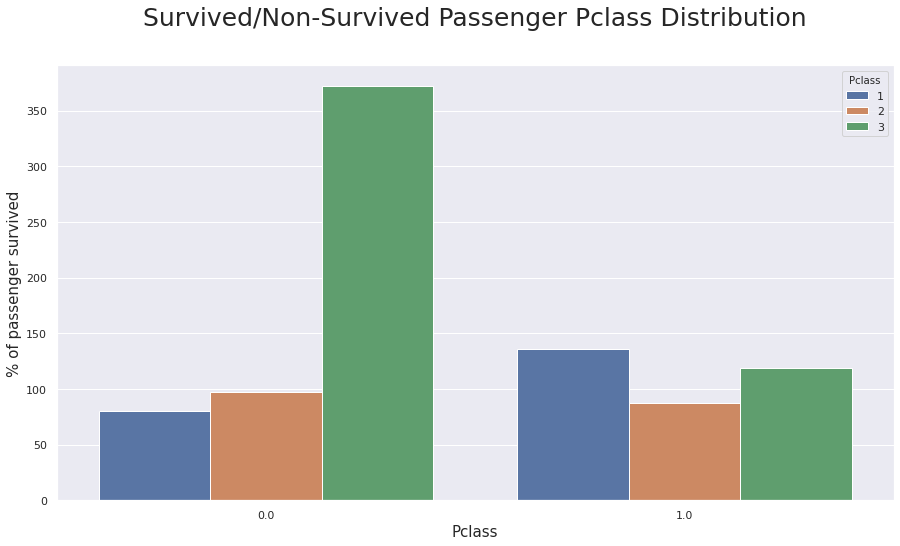

In [33]:
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
sns.countplot(x = 'Survived' , hue = 'Pclass' , data = all_data)
plt.title("Survived/Non-Survived Passenger Pclass Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Pclass",fontsize = 15);

* **Fare and Survived**

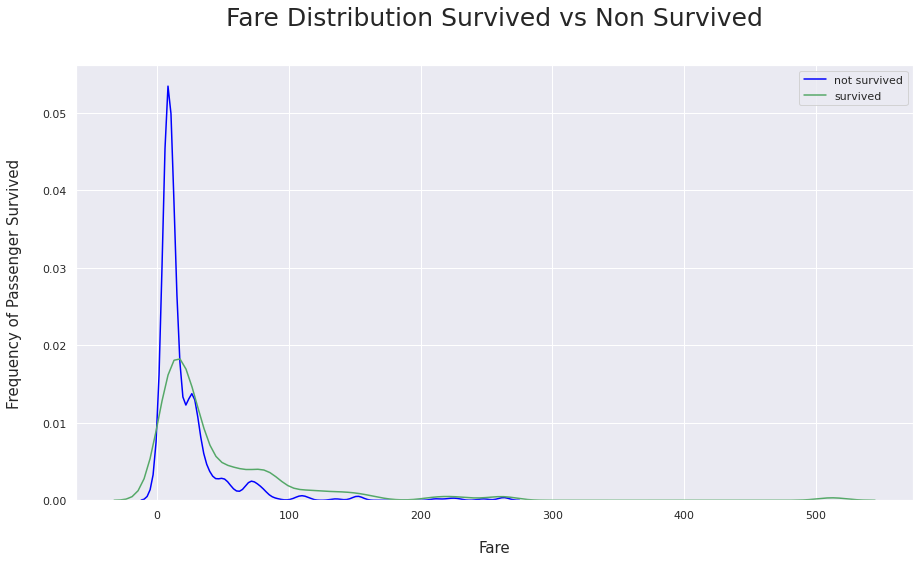

In [34]:
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='blue',label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g', label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

* **Age and Survived**

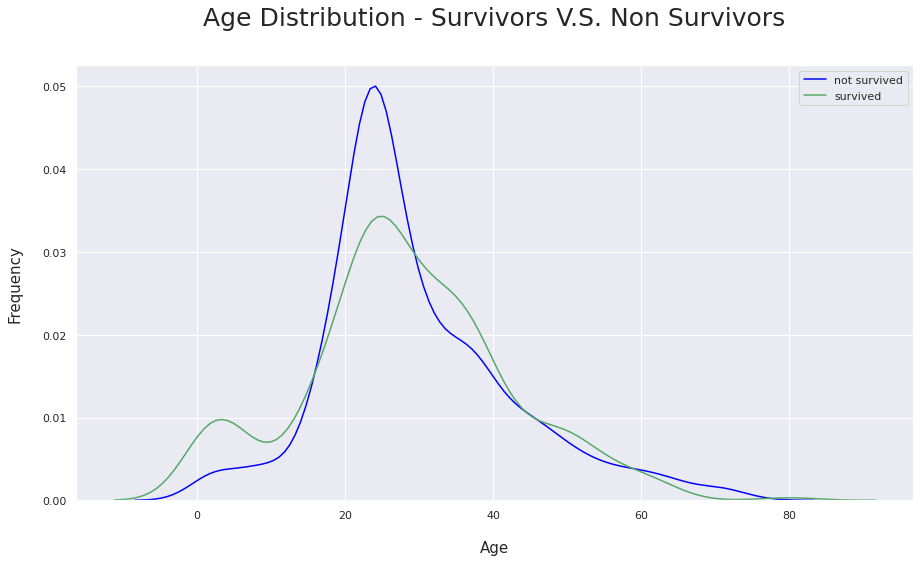

In [35]:
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='blue',label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g', label='survived')
plt.title('Age Distribution - Survivors V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

**3. FEATURE ENGINEERING**

**title**

Getting the title of each name as a new feature

In [36]:
all_data['title']=all_data.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())

In [37]:
newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}
all_data['title']=all_data.title.map(newtitles)

In [38]:
all_data['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

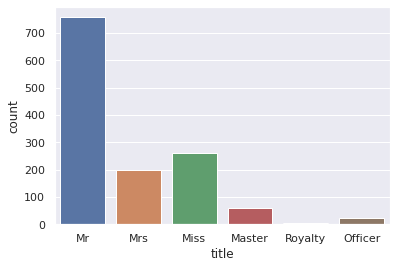

In [39]:
sns.countplot( x = 'title' , data = all_data)

In [40]:
all_data.drop(['Name'], axis = 1 , inplace = True)

**Ticket**

In [41]:
all_data['Ticket'].value_counts().sort_values(ascending = False)

CA. 2343    11
CA 2144      8
1601         8
PC 17608     7
347077       7
            ..
349250       1
345777       1
349232       1
366713       1
335097       1
Name: Ticket, Length: 929, dtype: int64

In [42]:
all_data.drop(['Ticket'] , axis = 1,inplace = True)

**Family_size**

In [43]:
all_data["Family_size"] = all_data["Parch"] + all_data["SibSp"] + 1
all_data['Family_size'].head()

0    2
1    2
2    1
3    2
4    1
Name: Family_size, dtype: int64

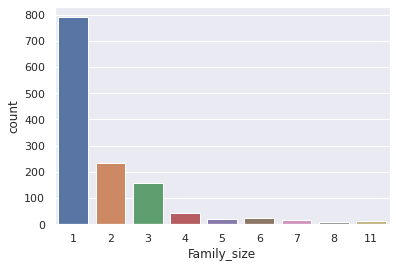

In [44]:
sns.countplot('Family_size', data = all_data)

In [45]:
all_data.drop(['SibSp','Parch'] , axis = 1, inplace = True)

**PassengerId**

In [46]:
all_data.drop(['PassengerId'], axis = 1,inplace = True)

**Encoding of categorical variables**

In [47]:
all_data['Sex'] = all_data.Sex.map({'male' : 0 , 'female' : 1})

In [48]:
converting_features = ["Embarked", "Pclass", "Cabin", "title"]
all_data = pd.get_dummies(all_data, columns=converting_features, prefix=converting_features)
all_data.head()

,Survived,Sex,Age,Fare,Family_size,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty
0,0.0,0,22.0,7.2500,2,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1.0,1,38.0,71.2833,2,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,1,26.0,7.9250,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,1,35.0,53.1000,2,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,0,35.0,8.0500,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [49]:
cols = all_data.columns.tolist()
print(cols)

['Survived', 'Sex', 'Age', 'Fare', 'Family_size', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_Officer', 'title_Royalty']


In [50]:
train = all_data[:len(train)]
test = all_data[len(train):]

**Seperating dependant and independent variables**

In [51]:
y = train['Survived']
X_train = train.drop('Survived', axis = 1)
test = test.drop('Survived', axis = 1)
print(X_train.shape)
print(test.shape)

(891, 24)
(418, 24)


**Splitting the training data**

In [52]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_train , y , test_size = 0.33, random_state = 0)


In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((596, 24), (295, 24), (596,), (295,))

**4. FEATURE SCALING**

*Before Scaling*

In [54]:
headers = X_train.columns 
X_train.head()

,Sex,Age,Fare,Family_size,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty
242,0,29.0,10.50,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
344,0,36.0,13.00,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
170,0,61.0,33.50,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
187,0,45.0,26.55,1,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
800,0,34.0,13.00,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [55]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train = std_scale.fit_transform(X_train)
test = std_scale.fit_transform(test)


*After Scaling*

In [56]:
pd.DataFrame(X_train , columns = headers).head()

,Sex,Age,Fare,Family_size,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty
0,-0.724083,-0.011286,-0.455103,-0.546499,-0.462438,-0.315644,0.603195,-0.577350,1.931362,-1.080404,...,-0.230225,-0.416207,0.996650,-0.245964,-0.226156,-0.496852,0.832575,-0.407849,-0.123823,-0.071127
1,-0.724083,0.520756,-0.403337,-0.546499,-0.462438,-0.315644,0.603195,-0.577350,1.931362,-1.080404,...,-0.230225,-0.416207,0.996650,-0.245964,-0.226156,-0.496852,0.832575,-0.407849,-0.123823,-0.071127
2,-0.724083,2.420905,0.021148,-0.546499,-0.462438,-0.315644,0.603195,1.732051,-0.517769,-1.080404,...,-0.230225,-0.416207,-1.003361,-0.245964,-0.226156,-0.496852,0.832575,-0.407849,-0.123823,-0.071127
3,-0.724083,1.204810,-0.122762,-0.546499,-0.462438,-0.315644,0.603195,1.732051,-0.517769,-1.080404,...,-0.230225,2.402650,-1.003361,-0.245964,-0.226156,-0.496852,0.832575,-0.407849,-0.123823,-0.071127
4,-0.724083,0.368744,-0.403337,-0.546499,-0.462438,-0.315644,0.603195,-0.577350,1.931362,-1.080404,...,-0.230225,-0.416207,0.996650,-0.245964,-0.226156,-0.496852,0.832575,-0.407849,-0.123823,-0.071127


**5. MODELLING  THE  DATA**

In [57]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [58]:
logmodel.fit(X_train, y_train)
acc_log_train = round(logmodel.score(X_train, y_train)*100,2) 
acc_log_test = round(logmodel.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))


Training Accuracy: % 84.23
Testing Accuracy: % 68.14


In [59]:
prediction = logmodel.predict(X_test)

In [60]:
prediction

array([0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0.

**Confusion Matrix**

In [61]:
from sklearn.metrics import confusion_matrix
prediction = logmodel.predict(X_test)
cm = confusion_matrix(y_test, prediction)
cm


array([[181,   3],
       [ 91,  20]])

In [62]:
from sklearn.model_selection import cross_val_score

**Logistic Regression**

In [63]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr , X_train , y_train , cv = 5)
print(cv)
print(cv.mean())

[0.84166667 0.79831933 0.81512605 0.82352941 0.86554622]
0.8288375350140054


**Random Forest** 

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf , X_train , y_train , cv = 5)
print(cv)
print(cv.mean())


[0.76666667 0.79831933 0.79831933 0.76470588 0.81512605]
0.7886274509803922


**Support Vector Classifier**

In [65]:
from sklearn.svm import SVC
svc = SVC(probability = True)
cv = cross_val_score(svc , X_train , y_train , cv = 5)
print(cv)
print(cv.mean())

[0.78333333 0.81512605 0.78991597 0.78151261 0.85714286]
0.805406162464986


**Voting Classifiers**

In [66]:
from sklearn.ensemble import VotingClassifier 
voting = VotingClassifier(estimators = [('LogisticRegression' , lr) , ('RandomForest' , rf) , ('Support Vector Classifier' , svc)] ,  voting = 'soft')
cv = cross_val_score(voting , X_train , y_train , cv = 5)
print(cv)
print(cv.mean())

[0.81666667 0.82352941 0.83193277 0.81512605 0.85714286]
0.8288795518207281


In [67]:
voting.fit(X_train , y_train)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(max_iter=2000)),
                             ('RandomForest',
                              RandomForestClassifier(random_state=1)),
                             ('Support Vector Classifier',
                              SVC(probability=True))],
                 voting='soft')

In [68]:
from sklearn.metrics import accuracy_score
voting_accy = round(accuracy_score(voting.predict(X_test) , y_test), 3)
print(voting_accy)

0.678


**SUBMITTING THE TEST PREDICTIONS**

In [69]:
predictions = voting.predict(test)
output = pd.DataFrame({'PassengerId': passengerid , 'Survived': predictions })
output.PassengerId = output.PassengerId.astype(int)
output.Survived = output.Survived.astype(int)
output.to_csv('My_Submission.csv', index=False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
